# Detection of influencers in a network

## Case study description

You are a data scientist at LinkedIn. Your colleagues from marketing want to organize an online marketing campaign for their client, a restaurant in the **Bay area** (San Francisco Bay area). They have read a lot about social network analysis and ask you to find the **5 most influential people** on the network who would be best to promote the restaurant.

What could you do to test your detection of influencers? This step is called the evaluation of your model (cf. CRISP-DM steps). It is a very important step to decide whether you will deploy your method.... or if it will just remain a lab toy!

## Prepare the environment

### Import the libraries
[NetworkX Documentation](https://networkx.github.io/documentation/stable/reference/index.html)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd

### Import the data

Clone repository

In [ ]:
# Clone the repo containing the network data

!git clone -l -s https://github.com/mikeguzman1294/SocialNetworkAnalysis.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 6), reused 22 (delta 5), pack-reused 0
Unpacking objects: 100% (26/26), 1.00 MiB | 4.49 MiB/s, done.


In [ ]:
# Move to the relative path containing the data

%cd cloned-repo/challenge_1/
!ls

/content/cloned-repo/challenge_1
college_with_60percent_of_nodes_remoded.csv
employer_with_60percent_of_nodes_remoded.csv
empty.csv
groundtruth
location_with_60percent_of_nodes_remoded.csv
mediumLinkedin.gephi
mediumLinkedin.gexf
README.md
UserProfilingEgoNetworkIllinois.pdf


Load the graph

In [ ]:
# Load the graph
# The graph is an extraction from LinkedIn Social Network

G = nx.read_gexf("mediumLinkedin.gexf")

## Exploratory analysis


### Graph Exploration


Basic information of the graph.

In [ ]:
# Networkx short summary of information for the graph gG
print(G)

Graph with 811 nodes and 1597 edges


Plot the degree distribution.

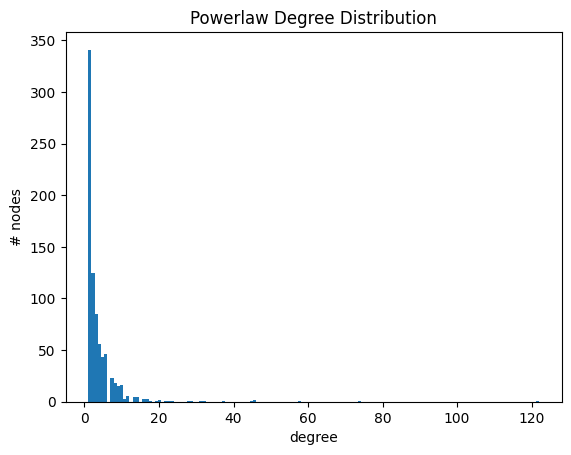

In [ ]:
# Draw the degree distribution. If powerlow distribution, the graph shows one of the properties
# of a real (complex) network, such as social networks, biological networks, internet networks.

plt.figure(num=None)
fig = plt.figure(1)
degree_sequence=[d for n, d in G.degree()] # degree sequence
plt.hist(degree_sequence, bins='auto')  
plt.title("Powerlaw Degree Distribution")
plt.ylabel("# nodes")
plt.xlabel("degree")
plt.show()
pylab.close()
del fig

Plot the graph

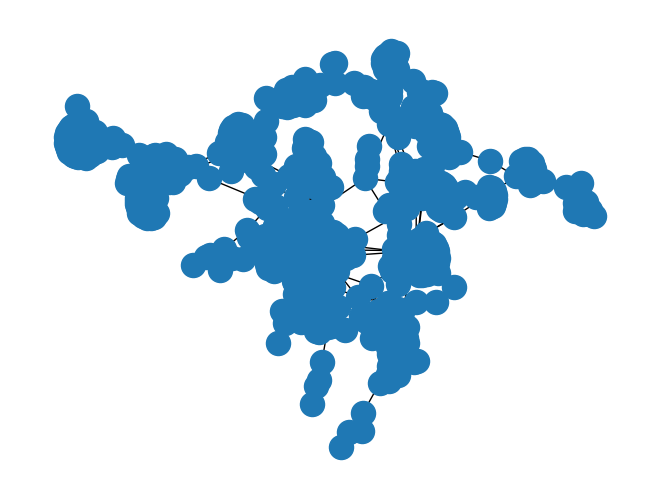

In [ ]:
nx.draw(G)

### Dataset Exploration

Get an insight on the filled location dataset.

In [ ]:
# Convert location csv into Pandas Dataframe

data_location = pd.read_csv('groundtruth/location.csv', sep='\t', header='infer')
data_location.head()

,name,location
0,U27476,greater new york city area
1,U4665,greater chicago area
2,U1313,norfolk virginia area
3,U8804,bologna area italy
4,U14078,stockholm sweden


In [ ]:
# Get the shape of the dataframe
print(f'Dataset shape:\n{data_location.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{data_location.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{data_location.info()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{data_location.describe(include = object).transpose()}')

Dataset shape:
(811, 2)

Dataset attributes:
Index(['name', 'location'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      811 non-null    object
 1   location  811 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB
Dataset general information:
None

Dataset description:
Categorical Data
         count unique                             top freq
name       811    811                          U27476    1
location   811    135  urbana-champaign illinois area  224


Check for null values

In [ ]:
# Check for any null values once again

print(f'Null Values per Feature\n{data_location.isnull().sum()}\n')

Null Values per Feature
name        0
location    0
dtype: int64



Find out how many users live in the bay area.

In [ ]:
data_location['location'].value_counts()

urbana-champaign illinois area               224
san francisco bay area                        79
greater chicago area                          68
greater new york city area                    36
china                                         30
                                            ... 
ncr - national capital region philippines      1
salinas california area                        1
ulm area germany                               1
mannheim area germany                          1
las vegas nevada area                          1
Name: location, Length: 135, dtype: int64

Create set with users living in bay Area.

In [ ]:
bay_area = set ( data_location.loc[data_location['location'].isin(['san francisco bay area']),'name'].values )
len(bay_area)

79

## Find global influencers

First seek to detect the most influent nodes according to different centrality measures in spite of the geographic location of the node.

Since we seek to find the top 5 most influential nodes in Bay Area, we define a global constant to set that number.

In [ ]:
num_influencers = 5

### Degree
The Degree Centrality algorithm can be used to find popular nodes within a graph. Degree centrality measures the number of incoming or outgoing (or both) relationships from a node, depending on the orientation of a relationship projection.

It can be applied to either weighted or unweighted graphs. In the weighted case the algorithm computes the sum of all positive weights of adjacent relationships of a node, for each node in the graph. Non-positive weights are ignored.

Find the highest degree node and its degree.

In [ ]:
highest_degree_node = max(G.nodes, key=G.degree)
print(f'The highest degree node is: {highest_degree_node} with a degree of {G.degree(highest_degree_node)} neighbors.')

The highest degree node is: U27287 with a degree of 122 neighbors.


Nodes with higher degree.

In [ ]:
degree_list = sorted(G.degree, key=lambda x: x[1], reverse=True)
print(len(degree_list))
degree_list[:num_influencers]

811


[('U27287', 122), ('U7024', 74), ('U1045', 58), ('U7972', 46), ('U8670', 46)]

### Closeness
Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.

The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.

For each node u, the Closeness Centrality algorithm calculates the sum of its distances to all other nodes, based on calculating the shortest paths between all pairs of nodes. The resulting sum is then inverted to determine the closeness centrality score for that node.

Nodes with higher closeness.

In [ ]:
closeness_list = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)
print(len(closeness_list))
closeness_list[:num_influencers]

811


[('U27287', 0.2607855763039279),
 ('U2656', 0.2407847800237812),
 ('U4562', 0.23403640566310316),
 ('U7319', 0.2330264672036824),
 ('U4568', 0.23189235614085313)]

### Betweeness
Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.

The algorithm calculates shortest paths between all pairs of nodes in a graph. Each node receives a score, based on the number of shortest paths that pass through the node. Nodes that more frequently lie on shortest paths between other nodes will have higher betweenness centrality scores.

Betweenness centrality is implemented for graphs without weights or with positive weights. The GDS implementation is based on Brandes' approximate algorithm for unweighted graphs. For weighted graphs, multiple concurrent Dijkstra algorithms are used. The implementation requires O(n + m) space and runs in O(n * m) time, where n is the number of nodes and m the number of relationships in the graph.

In [ ]:
betweenness_list = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)
print(len(betweenness_list))
betweenness_list[:num_influencers]

811


[('U27287', 0.4714778848757611),
 ('U7024', 0.2982615589321148),
 ('U11591', 0.2367332287634583),
 ('U7091', 0.19301616678984643),
 ('U8670', 0.1717989971049202)]

### Eigenvectors
Eigenvector Centrality is an algorithm that measures the transitive influence of nodes. Relationships originating from high-scoring nodes contribute more to the score of a node than connections from low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

In [ ]:
eigenvector_list = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)
print(len(eigenvector_list))
eigenvector_list[:num_influencers]

811


[('U27287', 0.5730198547119136),
 ('U24045', 0.22040575754968933),
 ('U24504', 0.15500698905108956),
 ('U25563', 0.1548399997252645),
 ('U27471', 0.15394254973687538)]

### Compare methods

Create Dataframe with columns sorted by globally most influential nodes for each method.

In [ ]:
global_influencers = pd.DataFrame({'Degree':      [node[0] for node in degree_list],
                                   'Closeness':   [node[0] for node in closeness_list],
                                   'Betweenness': [node[0] for node in betweenness_list],
                                   'Eigenvectors':[node[0] for node in eigenvector_list]})

Show the 5 globally most influential nodes.

In [ ]:
global_influencers.head(num_influencers)

,Degree,Closeness,Betweenness,Eigenvectors
0,U27287,U27287,U27287,U27287
1,U7024,U2656,U7024,U24045
2,U1045,U4562,U11591,U24504
3,U7972,U7319,U7091,U25563
4,U8670,U4568,U8670,U27471


## Find constrained influencers

### Bay Influencers
In this strategy we apply all the centrality measures proposed above, but only in the subset of the nodes living in the Bay Area.

Degree

In [ ]:
degree_bay_list = [node for node in degree_list if node[0] in bay_area]
degree_bay_list[:num_influencers]

[('U8670', 46), ('U15267', 32), ('U24045', 24), ('U4568', 14), ('U27661', 9)]

Closeness

In [ ]:
closeness_bay_list = [node for node in closeness_list if node[0] in bay_area]
closeness_bay_list[:num_influencers]

[('U4568', 0.23189235614085313),
 ('U7202', 0.22959183673469388),
 ('U24045', 0.22810475922275417),
 ('U8670', 0.2162883845126836),
 ('U2627', 0.2131578947368421)]

Betweenness

In [ ]:
betweenness_bay_list = [node for node in betweenness_list if node[0] in bay_area]
betweenness_bay_list[:num_influencers]

[('U8670', 0.1717989971049202),
 ('U4568', 0.12609941543882514),
 ('U14577', 0.10704019884151286),
 ('U7202', 0.0918985923399476),
 ('U15267', 0.05102962047337749)]

Eigenvectors

In [ ]:
eigenvector_bay_list = [node for node in eigenvector_list if node[0] in bay_area]
eigenvector_bay_list[:num_influencers]

[('U24045', 0.22040575754968933),
 ('U4568', 0.09534485924225647),
 ('U27661', 0.08269443436068134),
 ('U24064', 0.06566753060774415),
 ('U27460', 0.0638928512592222)]

Create Dataframe with columns sorted by most influential nodes living in Bay Area for each method.

In [ ]:
bay_influencers = pd.DataFrame({'Degree':      [node[0] for node in degree_bay_list],
                                'Closeness':   [node[0] for node in closeness_bay_list],
                                'Betweenness': [node[0] for node in betweenness_bay_list],
                                'Eigenvectors':[node[0] for node in eigenvector_bay_list]})

Show the 5 most influential nodes living in bay area.

In [ ]:
bay_influencers.head(num_influencers)

,Degree,Closeness,Betweenness,Eigenvectors
0,U8670,U4568,U8670,U24045
1,U15267,U7202,U4568,U4568
2,U24045,U24045,U14577,U27661
3,U4568,U8670,U7202,U24064
4,U27661,U2627,U15267,U27460


### Influencers with Bay Neighbors
In this strategy we apply all the centrality measures proposed above to create a subset representing a tunable percentage of the most influential nodes of the graph. After that, we select the nodes from the subset with the highest Bay Area neighbors count.

In [ ]:
# Tunable percentage of the most influential nodes from the graph

elitism_percentage = 2

# Compute the total number of nodes to subset given an elitism percentage

elite_nodes = int ( G.number_of_nodes() * ( elitism_percentage / 100 ) )
elite_nodes

16

Create a function that can count all the Bay Area neighbors for a node.

In [ ]:
# O(n) time | O(1) space
def bay_neighbors(node, member_list) :
  
  neighbor_counter = 0

  # Loop through all the neighbors of a given node and store it if it lives in the Bay Area
  for neighbor in G.neighbors(node):
    if neighbor in member_list :
      neighbor_counter += 1

  return neighbor_counter

In [ ]:
# Test the Bay Neighbors function

for node in degree_list[:elite_nodes] :
  print( node, bay_neighbors(node[0], bay_area) )  

('U27287', 122) 22
('U7024', 74) 21
('U1045', 58) 1
('U7972', 46) 1
('U8670', 46) 2
('U7091', 45) 0
('U4562', 37) 4
('U15267', 32) 1
('U5977', 31) 0
('U4485', 29) 1
('U22747', 28) 3
('U24045', 24) 0
('U14068', 23) 1
('U6000', 22) 0
('U18514', 20) 1
('U11566', 20) 7


Degree

In [ ]:
degree_bay_neighbors_list = sorted(degree_list[:elite_nodes], key=lambda x: bay_neighbors(x[0], bay_area), reverse=True)
degree_bay_neighbors_list[:num_influencers]

[('U27287', 122), ('U7024', 74), ('U11566', 20), ('U4562', 37), ('U22747', 28)]

Closeness

In [ ]:
closeness_bay_neighbors_list = sorted(closeness_list[:elite_nodes], key=lambda x: bay_neighbors(x[0], bay_area), reverse=True)
closeness_bay_neighbors_list[:num_influencers]

[('U27287', 0.2607855763039279),
 ('U11566', 0.22972206466250708),
 ('U4562', 0.23403640566310316),
 ('U2656', 0.2407847800237812),
 ('U4586', 0.23090079817559864)]

Betweenness

In [ ]:
betweenness_bay_neighbors_list = sorted(betweenness_list[:elite_nodes], key=lambda x: bay_neighbors(x[0], bay_area), reverse=True)
betweenness_bay_neighbors_list[:num_influencers]

[('U27287', 0.4714778848757611),
 ('U7024', 0.2982615589321148),
 ('U11566', 0.11197087408265695),
 ('U4562', 0.13405274159589942),
 ('U8670', 0.1717989971049202)]

Eigenvectors

In [ ]:
eigenvector_bay_neighbors_list = sorted(eigenvector_list[:elite_nodes], key=lambda x: bay_neighbors(x[0], bay_area), reverse=True)
eigenvector_bay_neighbors_list[:num_influencers]

[('U27287', 0.5730198547119136),
 ('U11566', 0.132802367761169),
 ('U4562', 0.14804530313314254),
 ('U2656', 0.13043472655570323),
 ('U16127', 0.11480146613711809)]

Create Dataframe with the 10 most influential nodes in bay area for each method per column.

In [ ]:
bay_neighbors_influencers = pd.DataFrame({'Degree':      [node[0] for node in degree_bay_neighbors_list],
                                          'Closeness':   [node[0] for node in closeness_bay_neighbors_list],
                                          'Betweenness': [node[0] for node in betweenness_bay_neighbors_list],
                                          'Eigenvectors':[node[0] for node in eigenvector_bay_neighbors_list]})

In [ ]:
bay_neighbors_influencers.head(num_influencers)

,Degree,Closeness,Betweenness,Eigenvectors
0,U27287,U27287,U27287,U27287
1,U7024,U11566,U7024,U11566
2,U11566,U4562,U11566,U4562
3,U4562,U2656,U4562,U2656
4,U22747,U4586,U8670,U16127
